# 6. 결정트리

**기본설정**

파이썬 3.7 이상을 요구한다.

In [3]:
import sys

assert sys.version_info >= (3, 7)

사이킷런 1.0.1 이상을 요구한다.

In [4]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

다음은 이미지에 포함된 폰트 크기를 설정한다.

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/decision_trees` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [6]:
from pathlib import Path

# 이미지 저장용 디렉토리 지정
IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

## 6.1. 결정트리 훈련과 활용

### 6.1.1. 결정트리 훈련

`DecisionTreeClassifier` 클래스는 결정트리 알고리즘을 활용한 분류 모델을 지원한다.
아래 코드는 붓꽃 데이터의 꽃잎 길이와 꽃잎 너비 특성만을 이용한 결정트리 모델의 훈련방법을 보여준다.

- `max_depth=2`: 가지분할을 최대 2번까지만 허용하는 규제

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

### 6.1.2. 결정트리 시각화

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

구글 코랩이 아닌 오프라인 개발환경에서 아래 코드를 실행하기 위해 먼저 파이썬과 (우분투) 리눅스에서 다음 두 패키지를 설치해야 한다.
구글 코랩의 경우 기본으로 지원된다.

- 파이썬 graphviz 패키지:

    ```
    conda install python-graphviz
    ```
    <br><br>

- 우분투 graphviz 패키지:

    ```
    sudo apt-get update
    sudo apt-get -y install graphviz
    ```

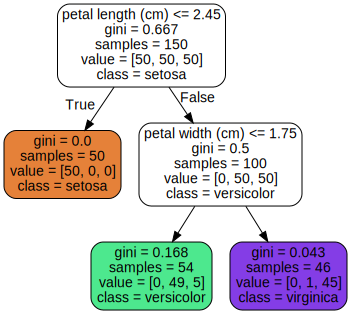

In [9]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")

**`dot` 커맨드라인 명령 API**

`.dot` 파일을 pdf, png 파일 등으로 변환하는 도구이다.

```python
# dot 이미지 파일 변환 코드 예제
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}
```

**주의사항:** 느낌표(`!`)는 주피터 노트북에서 파이썬 명령문이 아닌
커맨드라인 명령문을 실행할 때 사용하는 기호이다.

### 6.1.3. 클래스 예측

아래 코드는 가지분할을 최대 3번까지 허용해서 얻어진 모델의 훈련샘플들에 대한 예측결과를
그래프로 보여준다.

- 1차 분할 기준: 꽃잎 길이=2.45cm
- 2차 분할 기준: 꽃잎 너비=1.75cm
- 3차 분할 기준: (우상단) 꽃잎 길이=4.85cm, (우하단) 꽃잎 길이=4.95cm

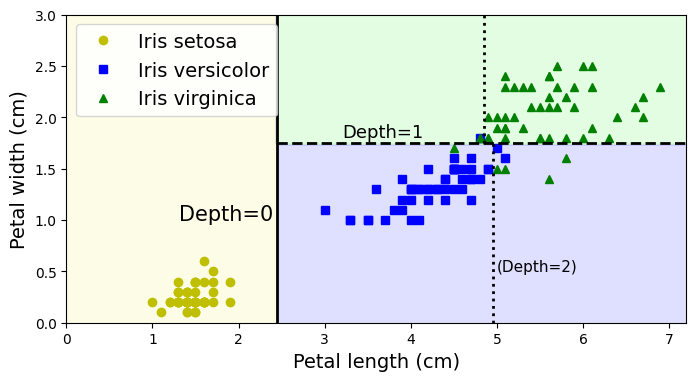

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 백그라운드 색상을 지정한다.
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

# 모든 점을 색상으로 구분한다.
# 세토사 영역: 옅노랑
# 버시컬러 영역: 옅파랑
# 버지니카 영역: 옅초록
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# 붓꼿 데이터셋에 대한 결정트리 훈련
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)

# 분할이 발생한 노드에서의 분할 임계점
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

# 결정경계 그리기
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

graphviz 이용한 결과는 다음과 같다.

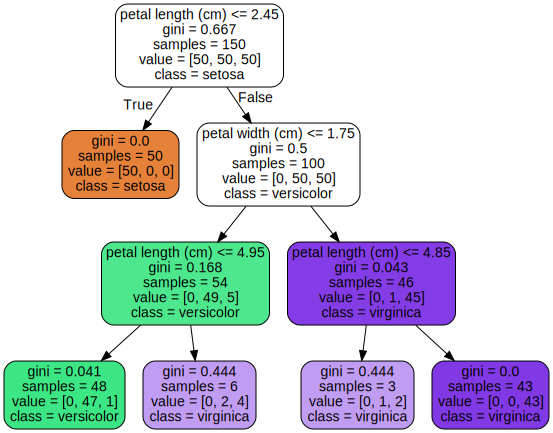

In [11]:
export_graphviz(
        tree_clf_deeper,
        out_file=str(IMAGES_PATH / "iris_tree_deeper.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(IMAGES_PATH / "iris_tree_deeper.dot")

훈련된 결정트리의 모든 정보는 `tree_` 속성에 저장된다.

In [12]:
tree_clf_deeper.tree_

각 노드의 지니 불순도는 다음과 같이 확인한다.

In [13]:
tree_clf_deeper.tree_.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04079861,
       0.44444444, 0.04253308, 0.44444444, 0.        ])

### 6.1.4. 클래스 확률 추정

꽃잎의 길이와 너비가 각각 5cm, 1.5cm인 붓꽃 샘플에 대한 각 클래스별 추정 확률은 다음과 같다.

In [14]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

가장 높은 확률을 갖는 클래스를 예측값으로 사용하며,
꽃잎의 길이와 너비가 5cm, 1.5cm인 붓꽃은 버시컬러로 추정된다.

- 0: 세토사
- 1: 버시컬러
- 2: 버지니카

In [15]:
tree_clf.predict([[5, 1.5]])

array([1])

`maximal_depth=3`으로 하면 버지니카로 예측한다.

In [16]:
tree_clf_deeper.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.333, 0.667]])

In [17]:
tree_clf_deeper.predict([[5, 1.5]])

array([2])

## 6.2. CART 훈련 알고리즘

### 6.2.1. CART 알고리즘의 시간복잡도

### 6.2.2. 지니 불순도 vs. 엔트로피

### 6.2.3. 규제 하이퍼파라미터

아래 코드는 `min_samples_leaf=5` 규제를 사용하는 모델(아래 그림 오른쪽)과
어느 규제도 사용하지 않은 모델(아래 그림 왼쪽)의 차이를 보여준다.
사용되는 훈련세트는 moons 데이터셋이다.

- 왼쪽 결정트리: 과대적합 발생
- 오른쪽 결정트리: `min_samples_leaf=5` 규제 사용. 즉, 리프에 최소 5개 이상의 샘플이 포함되어야 함.

In [18]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

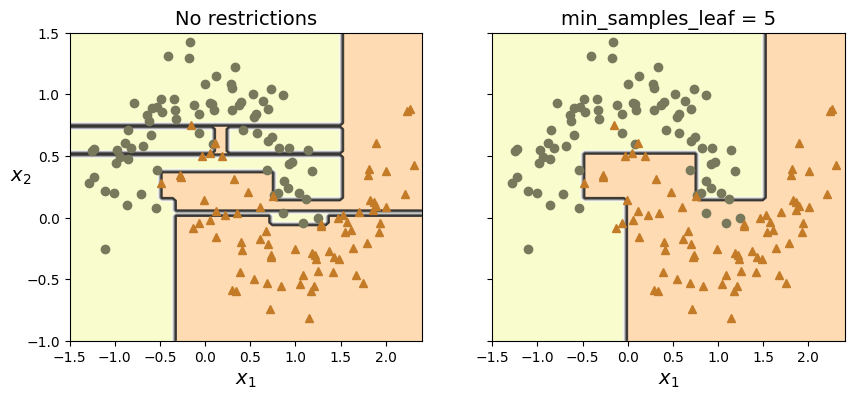

In [19]:
# 아래 그래프 그리는 코드

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼쪽 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")

# 오른쪽 그래프
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")

plt.show()

규제 있는 모델의 일반화 성능이 훨씬 좋다.
아래 코드는 다시 임의로 생성된 moons 데이터셋에 대한 두 모델의 분류 결과를 보여준다.

* 규제 없는 모델

In [20]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

* 규제 있는 모델

In [21]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## 6.3. 회귀 결정트리

**코드 예제**

잡음이 포함된 2차 함수 형태의 데이터셋을 이용하여 회귀 결정트리를 훈련시킨다.

In [22]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

생성된 데이터셋의 산점도는 다음과 같다.

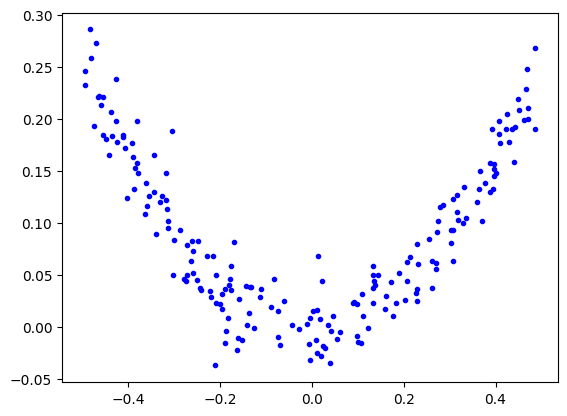

In [23]:
plt.plot(X_quad, y_quad, "b.")
plt.show()

`DecisionTreeRegressor` 모델을 훈련시키는 방법은 분류 결정트리와 거의 동일하다.

In [24]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

`x1=0.2`에 대한 예측값은 0.028 정도이다.

In [25]:
tree_reg.predict([[0.2]])

array([0.02765993])

훈련된 결정트리는 다음과 같다.

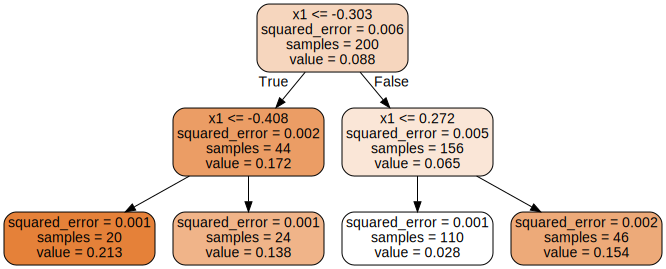

In [26]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file(IMAGES_PATH / "regression_tree.dot")

`max_depth=3` 으로 지정하고 훈련시켜보자.

In [27]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

두 결정트리가 알아낸 분할 기준점은 각각 다음과 같다.

In [28]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [29]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

아래 함수는 훈련세트와 노드별 예측값(빨강 직선)을 그린다.

In [30]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

- 왼편 그림: `max_depth=2`인 경우
- 오른편 그림: `max_depth=3`인 경우

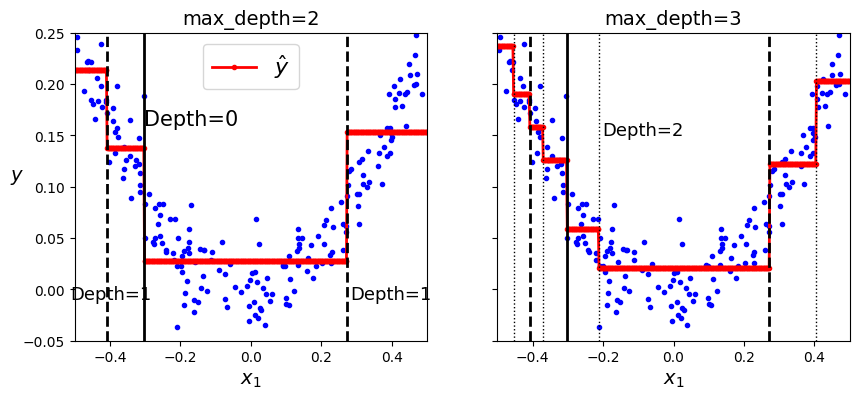

In [31]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼쪽 그림
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

# 오른쪽 그림
plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

# save_fig("tree_regression_plot")
plt.show()

아래 코드는 `min_samples_leaf=10` 규제를 사용하는 회귀모델(아래 그림 오른편)과
어느 규제도 사용하지 않은 회귀모델(아래 그림 왼편)의 차이를 보여준다.

- 왼편 결정트리: 과대적합 발생
- 오른편 결정트리: `min_samples_leaf=10` 규제 사용. 즉, 리프노드에 최소 10개 이상의 샘플이 포함되어 있어야 함.

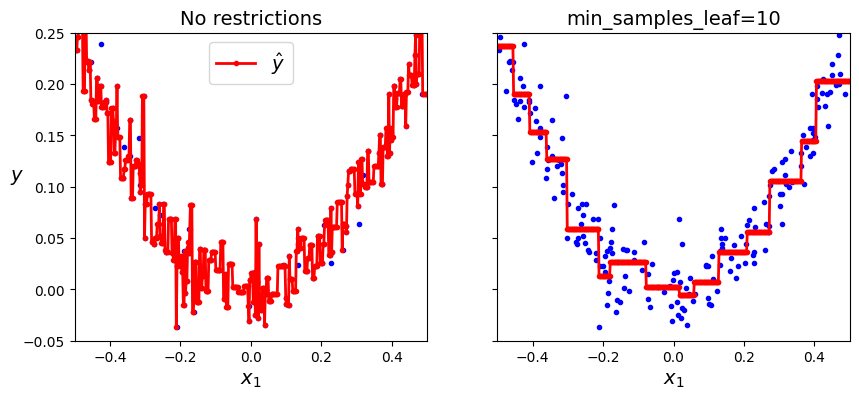

In [32]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼쪽 그림
plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

# 오른쪽 그림
plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

# save_fig("tree_regression_regularization_plot")
plt.show()

## 6.4 결정트리의 단점

### 6.4.1. 훈련셋 회전 민감도

**예제 1**

아래 코드는 결정트리 모델의 회전 민감도를 보여준다.
두 개의 특성을 가지며, 임의로 생성된 100개의 훈련 샘플을 시계방향으로 45도 회전시킨 후
훈련시킨 모델의 결정경계가 직선에서 계단식으로 변화되는 것을 볼 수 있다.
결국 일반화 성능이 보다 약한 모델이 생성되었다.

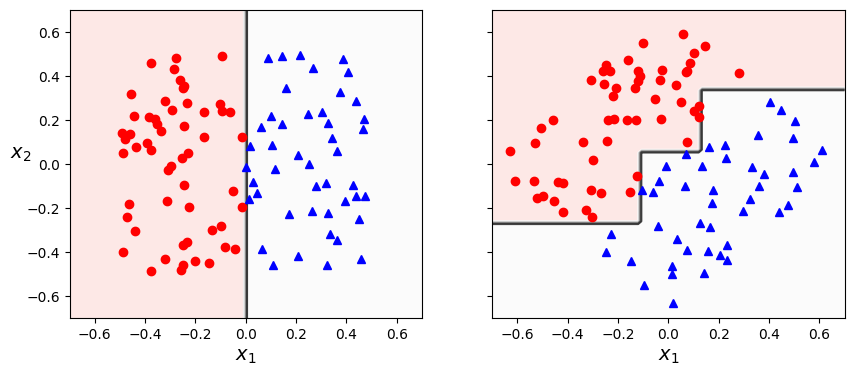

In [35]:
# 훈련셋 생성
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

# 45도 시계방향으로 회전
angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

# 두 결정트리 훈련
tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼쪽 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
# 오른쪽 그래프
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

plt.show()

**예제 2**

아래 코드는 붗꽃 데이터셋에 대해 PCA 기법으로 먼저 축을 회전시킨 다음에 결정트리를 훈련시키면 분류 모델의 결정경계가 이전과 많이 다름을 잘 보여준다.

In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

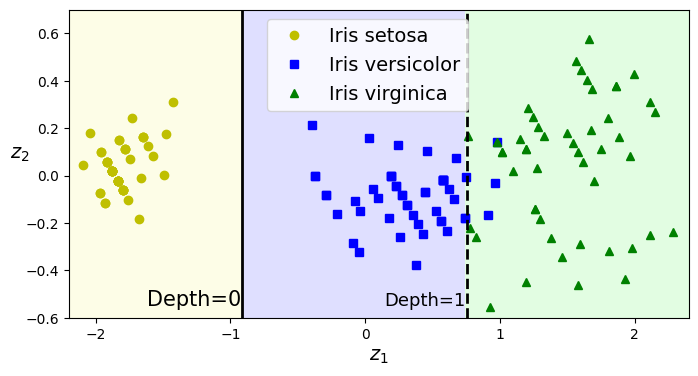

In [37]:
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
# save_fig("pca_preprocessing_plot")

plt.show()

### 6.4.2. 높은 분산

결정트리는 꽤 높은 분산을 갖는다. 즉, 훈련셋이나 하이퍼파라미터가 조금만 달라져도 완전히 다른 결정트리가 훈련될 수 있다. 심지어 동일한 모델을 훈련시켜도 많이 다른 결정트리가 생성되기도 한다. 이는 결정트리가 생성될 때 특성과 특성의 임곗값을 무작위로 선택하기 때문이다. 따라서 `random_state` 를 지정하지 않으면 아래 그래프와 같은 많이 다른 결정트리가 생성되기도 한다.

In [38]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

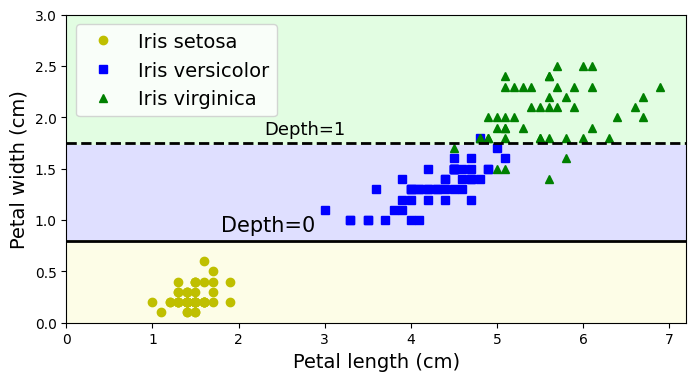

In [39]:
plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

## 부록 - 결정트리 구조

훈련된 `DecisionTreeClassifier`는 트리 구조를 `tree_` 속성에 저장한다.

In [40]:
tree = tree_clf.tree_
tree

- 전체 노드 수

In [41]:
tree.node_count

5

- 트리 깊이

In [42]:
tree.max_depth

2

- 분류에 사용된 클래스 수

In [43]:
tree.max_n_classes

3

- 분류에 사용된 특성 수

In [44]:
tree.n_features

2

- 레이블 종류 개수: 여기서는 1

In [45]:
tree.n_outputs

1

- 나뭇잎(leaves) 수

In [46]:
tree.n_leaves

np.int64(3)

**노드 정보**

노드에 대한 모든 정보는 1차원 넘파이 어레이로 저장된다.

- 노드(5개) 각각에서의 지니 불순도

In [47]:
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

- 각 노드의 왼쪽 자식 노드와 오른쪽 자식 노드의 인덱스. 아래 코드는 루트 노드의 자식 노드 인덱스 확인.

In [48]:
tree.children_left[0], tree.children_right[0]

(np.int64(1), np.int64(2))

- 모든 노드의 왼쪽 자식 노드

In [49]:
tree.children_left

array([ 1, -1,  3, -1, -1], dtype=int64)

- 모든 노드의 오른쪽 자식 노드

In [50]:
tree.children_right

array([ 2, -1,  4, -1, -1], dtype=int64)

- 왼쪽, 오른쪽 자식 노드의 인덱스가 동일한 경우 해당 노드가 이파리이 임을 의미함.
    아래 코드는 3번 노드가 이파리임을 보여줌.

In [51]:
tree.children_left[3], tree.children_right[3]

(np.int64(-1), np.int64(-1))

- 이파리 노드 확인 방법

In [52]:
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

- 자식을 갖는 노드에서 노드를 쪼갤 때 사용된 특성 정보는 `feature` 속성에 저장.
    아래 결과는 0번과 2번 노드가 자식을 갖는 노드임을 확인해줌. 음수는 이파리 노드임을 의미.

In [53]:
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

- 노드를 쪼갤 때 사용된 임계값도 확인 가능. 음수는 무시할 것.

In [54]:
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

- 각 노드에 포함된 클래스별 샘플 수

In [55]:
tree.value

array([[[0.33333333, 0.33333333, 0.33333333]],

       [[1.        , 0.        , 0.        ]],

       [[0.        , 0.5       , 0.5       ]],

       [[0.        , 0.90740741, 0.09259259]],

       [[0.        , 0.02173913, 0.97826087]]])

In [56]:
tree.value.shape

(5, 1, 3)

- 각 노드에 포함된 샘플 수

In [57]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

- 각 노드에서 클래스별 샘플의 합을 합친 결과는 해당 노드에 포함된 샘플 수와 동일함

In [58]:
np.all(tree.value.sum(axis=(1, 2)) == tree.n_node_samples)

np.False_

아래 코드는 각 노드의 깊이를 계산한다.

- 스택 자료형 활용. 리스트의 `append()` 와 `pop()` 메서드 이용.
- `append()` 메서드가 푸쉬(push) 기능 수행.

In [59]:
def compute_depth(tree_clf):
    tree = tree_clf.tree_
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_right[node], node_depth + 1))
            stack.append((tree.children_left[node], node_depth + 1))
    return depth

각 노드별 깊이

In [60]:
depth = compute_depth(tree_clf)
depth

array([0., 1., 1., 2., 2.])

- 깊이가 1인 노드 중에서 노드를 쪼갤 때 사용된 특성. 아래 코드에서 1은 꽆잎 너비를 가리킴.

In [61]:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

array([1], dtype=int64)

- 깊이가 1인 노드 중에서 노드를 쪼갤 때 사용된 임계값

In [62]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

array([1.75])

## 연습문제

## 1.

초승달 데이터셋을 이용한 결정트리 모델을 미세 조정한다.

a. 초승달 데이터셋

In [1]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. 훈련셋과 테스트셋으로 쪼개기

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)


c. 교차검증을 사용하는 그리드 탐색 실행. 힌트: 다양한 `max_leaf_nodes` 값 활용.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
tree_clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', refit=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                            20]},
             scoring='accuracy')

최적의 분류기 확인

In [6]:
# 최적의 분류기 확인
best_tree = grid_search.best_estimator_
print("최적의 max_leaf_nodes:", grid_search.best_params_)
print("최적의 교차검증 정확도:", grid_search.best_score_)

최적의 max_leaf_nodes: {'max_leaf_nodes': 20}
최적의 교차검증 정확도: 0.858625


d. 최적 모델을 전체 훈련셋에 대해 훈련을 다시 진행한 다음 테스트셋에 대한 정확도를 확인할 것. 85% ~ 87% 정도의 정확도 나와야 함.

단, `GridSearchCV`는 자동으로 전체 훈련셋을 대상으로 한 번 더 훈련한다.
이 옵션을 원하지 않는다면 `refit=False` 옵션을 `GridSearchCV` 를 선언할 때 지정한다.
따라서 단순히 아래와 같이 바로 테스트셋에 대한 정확도를 확인할 수 있다.

In [7]:
from sklearn.metrics import accuracy_score

y_pred = best_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("테스트셋 정확도:", test_accuracy)


테스트셋 정확도: 0.87


## 2.

랜덤 포레스트(random forest) 모델을 훈련하는 방법을 살펴본다.
랜덤 포레스트는 여러 개의 결정트리로 구성된다.

a. 무작위로 선택된 100개의 초승달 훈련 샘플로 구성된 훈련셋을 1000개 생성한다.
이를 위해 사이킷런의 `ShuffleSplit` 클래스를 이용한다.

In [8]:
from sklearn.model_selection import ShuffleSplit
import numpy as np

n_estimators = 1000
mini_train_size = 100
rs = ShuffleSplit(n_splits=n_estimators, train_size=mini_train_size, random_state=42)

mini_train_sets = []
for train_idx, _ in rs.split(X_train):
    mini_train_sets.append((X_train[train_idx], y_train[train_idx]))


b. 앞서 찾은 최적의 모델을 각 미니 훈련셋에 대해 추가 훈련한 다음 테스트셋에 대한 정확도의 평균값을 계산한다.
결과는 80% 정도.

- `clone()` 함수: 모델 복제. 동일 모델을 반복해서 사용하지 않기 위해 사용.

In [9]:
from sklearn.base import clone

accuracies = []
for X_mini, y_mini in mini_train_sets:
    tree_clone = clone(best_tree)
    tree_clone.fit(X_mini, y_mini)
    y_pred_mini = tree_clone.predict(X_test)
    acc = accuracy_score(y_test, y_pred_mini)
    accuracies.append(acc)

print("1000개 모델 평균 정확도:", np.mean(accuracies))


1000개 모델 평균 정확도: 0.8012284999999999


c. 이번에는 그런데 1000개의 모델의 정확도의 평균이 아닌 1000개의 모델이 가장 많이 예측하는 값을 예측값으로 사용해보자.

In [10]:
from scipy.stats import mode

predictions = np.array([clone(best_tree).fit(X_mini, y_mini).predict(X_test) for X_mini, y_mini in mini_train_sets])
y_pred_majority_votes, _ = mode(predictions, axis=0)
y_pred_majority_votes = y_pred_majority_votes.reshape(-1)


아래 코드는 테스트셋에 포함된 샘플별로 1000개의 모델이 예측한 값(클래스)의 최빈값(mode)를 계산한다.

In [11]:
all_predictions = []
for X_mini, y_mini in mini_train_sets:
    model = clone(best_tree)
    model.fit(X_mini, y_mini)
    preds = model.predict(X_test)
    all_predictions.append(preds)

d. 이 방식으로 계산된 예측값을 이용하면 정확도가 87% 정도로 상승한다.

- `y_pred_majority_votes.reshape([-1])`는 차원을 줄여 1차원 어레이로 변환한다.

In [12]:
all_predictions = np.array(all_predictions)   # (1000, 테스트 샘플 수)
mode_preds, _ = mode(all_predictions, axis=0)
final_preds = mode_preds.reshape([-1])        # (테스트 샘플 수,)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, final_preds)

0.872

e. 결론: 이와 같이 작은 모델 여러 개의 예측값 최빈값을 이용하는 방식을 앙상블 학습이라 한다.
결정트리를 이용한 앙상블 학습 모델 중에 하나가 다음에 배울 랜덤 포레스트(random forest) 모델이다.